<a href="https://colab.research.google.com/github/sak1b0/Thesis/blob/master/optimal_no_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0      2
1      4
2      4
3      3
4      2
5      7
6      8
7      2
8      9
9     11
10     7
11     7
12     1
13     8
14     5
15     6
16     Z
Name: 0, dtype: object
object data types:  1
after the conversion:  [2 4 4 3 2 7 8 2 9 11 7 7 1 8 5 6 25]
----------debug start----------
main data:  (20000, 17)
x:  (20000, 16)
y:  (20000, 1)
x_train:  (14000, 16)
x_test:  (6000, 16)
y_train:  (14000,)
y_test:  (6000,)
----------debug end----------


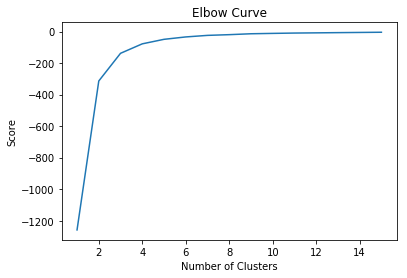

In [18]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import pandas as pd
import numpy as np

url='https://raw.githubusercontent.com/sak1b0/Thesis/master/allCSV/letter.csv'

df=pd.read_csv(url,header=None)
print(df.iloc[0,:])

#----------to handle nominal values---------

my_arr=[]

#track of column indices 
index=0
for item in df.dtypes:
  if(item=='object'):
    #if data type is nominal adding to the array
    my_arr.append(index)
  index=index+1
  
print('object data types: ',len(my_arr))

df=df.values

if(len(my_arr)>0):
  lbl=LabelEncoder()
  for item in my_arr:
    df[:,item] = lbl.fit_transform(df[:,item])
    
  print('after the conversion: ',df[0])    
#--------------------------------------------


df=np.asarray(df)

X, y = np.split(df,[-1],axis=1)
#issue here !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
y=y.astype('float64')

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

#to check additional info set the value of debug to 1
debug=0

def debug_me():
  print('----------debug start----------')
  print('main data: ',df.shape)
  print('x: ',X.shape)
  print('y: ',y.shape)
  print('x_train: ',x_train.shape)
  print('x_test: ',x_test.shape)
  print('y_train: ',y_train.shape)
  print('y_test: ',y_test.shape)
  print('----------debug end----------')




# X=np.asarray(X)
# y=np.asarray(y)
# y=y.ravel() #vector to array

x_train=np.asarray(x_train)
x_test=np.asarray(x_test)
y_train=np.asarray(y_train)
y_test=np.asarray(y_test)

y_train=y_train.ravel()
y_test=y_test.ravel()

debug_me()
#==========preprocessing done============


#==========optimal number of clusters====


X_norm = (x_train - x_train.mean()) / (x_train.max() - x_train.min())
Y_norm = (y_train - y_train.mean()) / (y_train.max() - y_train.min())
#pl.scatter(Y_norm,X_norm)
#pl.show()
Y_norm=Y_norm.reshape(-1, 1)
no_of_features=x_train.shape[1]

Nc = range(1, no_of_features)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Y_norm).score(Y_norm) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()